# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


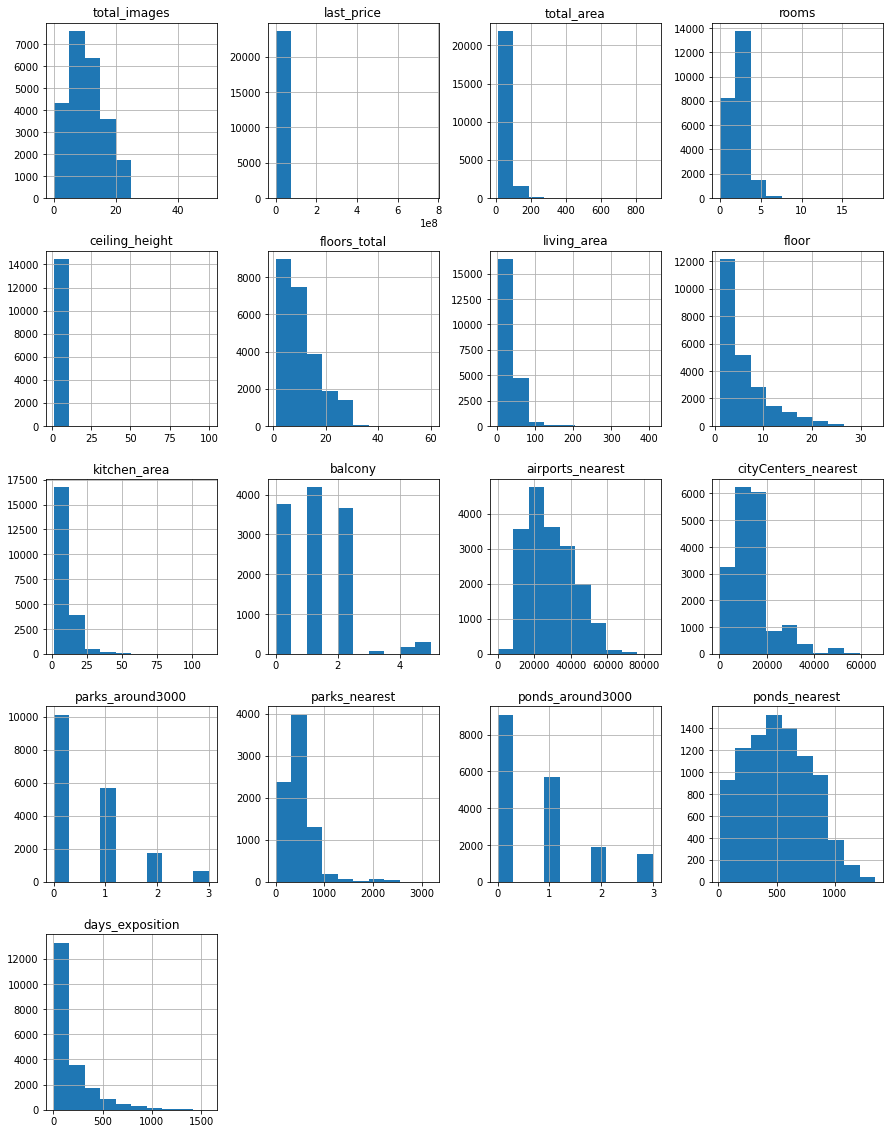

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

data.info() #общая информация о датафрейме
data.hist(figsize=(15,20)) # выводим гистограмы
data.head(10)


### Предобработка данных

In [3]:
data['balcony'] = data['balcony'].fillna(value = 0.0).astype(int)
print(data['balcony'].value_counts())
data['is_apartment'] = data['is_apartment'].fillna(value = 0).astype(bool)
print(data['is_apartment'].value_counts())
data['locality_name'] = data['locality_name'].fillna('')
print(data['locality_name'].value_counts())

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['days_exposition'].round().astype('Int32', errors='ignore')

pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm') 

data['last_price'] = data['last_price'].astype(int)


0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64
False    23649
True        50
Name: is_apartment, dtype: int64
Санкт-Петербург                      15721
посёлок Мурино                         522
посёлок Шушары                         440
Всеволожск                             398
Пушкин                                 369
                                     ...  
поселок Цвылёво                          1
садовое товарищество Приладожский        1
поселок Тёсово-4                         1
поселок Гончарово                        1
деревня Курковицы                        1
Name: locality_name, Length: 365, dtype: int64


 # Описание проделанной работы

Заполнил пропущенные значения наличия is_apartment и balcony, так как можно подразумевать, что если данных нет, значит это НЕ апартамент и НЕТ балкона. Остальные данные решил не трогать, так как точно распознать их нельзя. Попытался найти правда расстояние от населённого пункта до аэропорта и так далее, но не учёл того, что нам могли не указать каких либо населённых пунктов вовсе, поэтому так же решил эти пункты не заполнять, оставил в комментариях как наработки.

first_day_exposition перевёл в дату из строк.

Населённые пункты заполнил пустыми строками, чтобы не было пустых данных.

#Количество этажей, количество парков и водоёмов в радиусе 3000 метров перевёл в тип данных - int, так как их не может быть 2.1 и так далее. Не может быть 2.1 этажа в доме или 4.3 водоёма. (хотя вероятно ответ неверный, так как я все пустые значения превратил в 0)

cityCenters_nearest добавил пустые значения.

In [4]:
print(data['locality_name'].nunique())

365


In [5]:
#Задание с изучением столбца с названиями.

#print(data['locality_name'].unique())  
print(data['locality_name'].value_counts().head(60))
print(data['locality_name'].nunique())


data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('ё','е')

print(data['locality_name'].value_counts().head(60))
print(data['locality_name'].nunique())
#print(data['locality_name'].unique())  
data['last_price']

Санкт-Петербург                            15721
посёлок Мурино                               522
посёлок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
посёлок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
Кудрово                                      173
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
Сланцы                                       112
Волхов                                       111
Тосно               

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

Подвёл все неявные дубликаты к виду 'посёлок', убрал слово 'деревня' перед названиями населённых пунктов.

In [6]:
#Найдите и устраните редкие и выбивающиеся значения
data.describe()

for height in data['ceiling_height']:
    if height >= 20:
        data['ceiling_height'] = data['ceiling_height'].replace({height: height/10})

print(data['ceiling_height'].value_counts())
print(data['ceiling_height'].unique())

2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
        ... 
2.26       1
3.43       1
1.00       1
2.34       1
4.65       1
Name: ceiling_height, Length: 176, dtype: int64
[ 2.7    nan  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    2.65  3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5
  3.3   2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54
  2.51  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45
  3.6   2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74
  2.96  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83
  4.7   2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48
  2.62  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66
  3.85  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37
  3.09  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27
  4.1   2.93  3.46  3.47  3.33  3.63  3.32  1.2   8.3   2.98  2.86  3.17
  4.4  

Сделал цикл, который все значения больше либо равные 20 делит на 10, тогда значения высоты потолка принимают адекватный вид.

### Посчитайте и добавьте в таблицу новые столбцы

In [7]:
#1.цена одного квадратного метра;
data['price_one'] = data['last_price'] / data['total_area']
print(data['price_one'])
#2.день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['day_of_week'] = data['first_day_exposition'].dt.weekday
print(data['day_of_week'])
#3.месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month
print(data['month'])
#4.год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year
print(data['year'])

#5. тип этажа квартиры (значения — «первый», «последний», «другой»);

def apartment_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
         return 'другой'

data['apartment_floor'] = data.apply(apartment_floor, axis = 1)
print(data['apartment_floor'].head)
print(data['apartment_floor'].value_counts())



# 6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['distance_to_city_center'] = data['cityCenters_nearest']
data['distance_to_city_center'] = (data['distance_to_city_center']/1000).round(0)
print(data['distance_to_city_center'])
print(data)

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_one, Length: 23699, dtype: float64
0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_of_week, Length: 23699, dtype: int64
0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64
0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64
<bound method NDFrame.head of 0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696  

Добавил цену одного квадратного метра путём деления цены на общую площадь.
День недели, месяц и год нашел благодаря datetime.
Для поиска типа этажа написал функцию, в которой значение этажа = 1 сделал первым этажом, общее число этажей приравнял как последний этаж, так как мы не знаем какое количество этажей может быть в доме, это будет самый оптимальный вариант. Остальные этажи получили тип 'другой'.
Создал новый столбец в котором перевел расстояние в центр из метров в км и сделал тип данных для округления чисел.

### Проведите исследовательский анализ данных

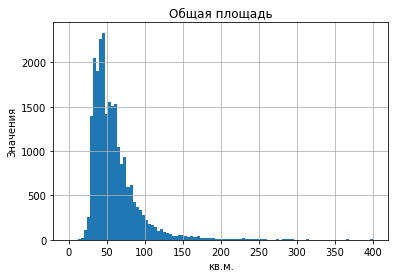

In [8]:
# print(data['total_area'].describe())
# print(data['total_area'].value_counts().sort_values(ascending = True))
data['total_area'].hist(bins=100, range = (0,400))
plt.title('Общая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Значения')
plt.show()

Из данной гистограммы можно увидеть, что большинство недвижимости имеет общую площадь 40-70 кв.м.

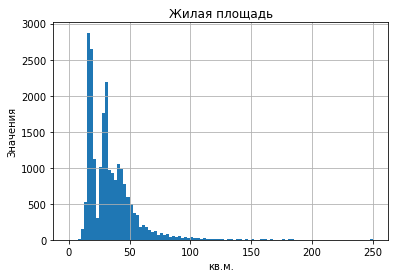

In [9]:
# print(data['living_area'].describe())
# print(data['living_area'].value_counts().sort_values(ascending = True))
data['living_area'].hist(bins=100, range = (0,250))
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Значения')
plt.show()

А вот в гитограмме жилой площади, как и ожидалось, значения кв.м. меньше, чем в общей площади, собственно это логично, так и должно быть, значит данные правильные. Больше всего значений жилой площади - 30-40 кв.м.

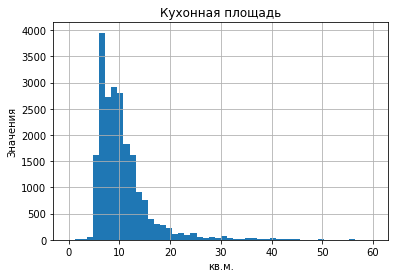

In [10]:
# print(data['kitchen_area'].describe())
# print(data['kitchen_area'].value_counts().sort_values(ascending = True))
data['kitchen_area'].hist(bins=50, range = (0,60))
plt.title('Кухонная площадь')
plt.xlabel('кв.м.')
plt.ylabel('Значения')
plt.show()

Аналогично с прошлой гистограммой, только данные о площади кухни. Больше всего кухонь с площадью 6-10 кв.м.

In [11]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'] = data['last_price'].astype(int)
data['last_price']

0        13
1         3
2         5
3        64
4        10
         ..
23694     9
23695     3
23696     2
23697    11
23698     1
Name: last_price, Length: 23699, dtype: int64

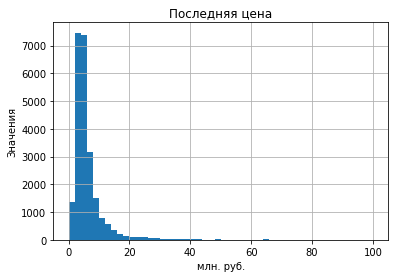

In [12]:
# print(data['last_price'].describe())
# print(data['last_price'].value_counts().sort_values(ascending = True))

data['last_price']
data['last_price'].hist(bins=50, range = (0,100))
plt.title('Последняя цена')
plt.xlabel('млн. руб.')
plt.ylabel('Значения')
plt.show()

В данном графике мы можем видеть сколько млн. рублей чаще всего стоит недвижимость. в основном эта цифра примерно около 5-8 млн.рублей.

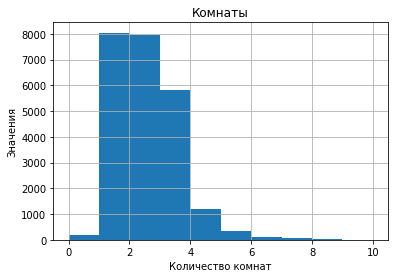

In [13]:
# print(data['rooms'].describe())
# print(data['rooms'].value_counts().sort_values(ascending = True))
data['rooms'].hist(bins=10, range = (0,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Значения')
plt.show()

Больше всего объявлений с 1-3 комнатными квартирами.

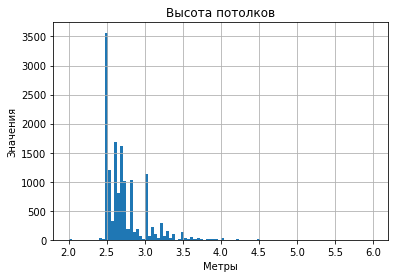

In [14]:
# print(data['ceiling_height'].describe())
# print(data['ceiling_height'].value_counts().sort_values(ascending = True))
data['ceiling_height'].hist(bins=100, range = (2,6))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Значения')
plt.show()

В основном у всех потолки равны 2.5 метров высоты.

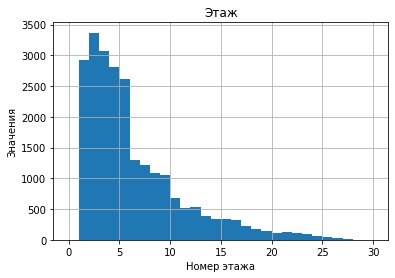

In [15]:
# print(data['floor'].describe())
# print(data['floor'].value_counts().sort_values(ascending = True))
data['floor'].hist(bins=30, range = (0,30))
plt.title('Этаж')
plt.xlabel('Номер этажа')
plt.ylabel('Значения')
plt.show()

Люди чаще приобретают недвижимость на 1-5 этажах.

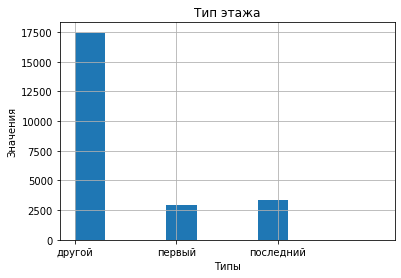

In [16]:
# print(data['apartment_floor'].describe())
# print(data['apartment_floor'].value_counts().sort_values(ascending = True))
data['apartment_floor'].hist(bins=10, range = (0,3))
plt.title('Тип этажа')
plt.xlabel('Типы')
plt.ylabel('Значения')
plt.show()

В данной гистограмме можно увидеть, что зачастую люди предпочитают брать недвижимость на всех этажак, кроме как на первом и на последнем.

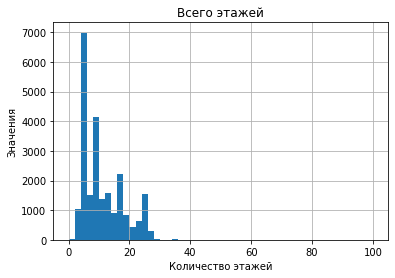

In [17]:
# print(data['floors_total'].describe())
# print(data['floors_total'].value_counts().sort_values(ascending = True))
data['floors_total'].hist(bins=50, range = (0,100))
plt.title('Всего этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Значения')
plt.show()

В данном случае есть мысль, что можно ограничить количество этажей - 30. Но смущает тот факт, что может быть действительно дом с 60 этажами, а в объявлении были квартиры только с <20 этажами.

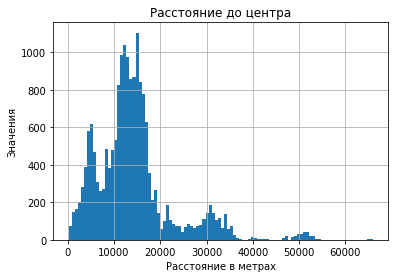

In [18]:
# print(data['cityCenters_nearest'].describe())
# print(data['cityCenters_nearest'].value_counts().sort_values(ascending = True))
data['cityCenters_nearest'].hist(bins=100)
plt.title('Расстояние до центра')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Значения')
plt.show()
### Проставил 0 на пустых значениях, чтобы можно было рассчитать расстояние в километрах и перевести в тип int.
### Теперь эти нули портят график :) Не совсем понимаю как от них избавиться.

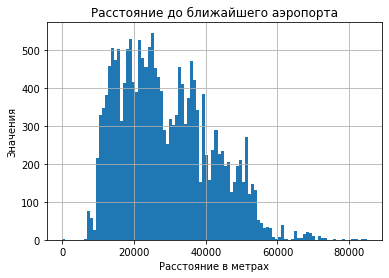

In [19]:
# print(data['airports_nearest'].describe())
# print(data['airports_nearest'].value_counts().sort_values(ascending = True))
data['airports_nearest'].hist(bins=100)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Значения')
plt.show()

Аналогично, в данном графике видим количество недвижимости и её расстояние до ближайшего аэропорта.

Зачастую недвижимость довольно таки далеко от аэропортов, но есть и такая, которая в 10000 метрах, в таких местах должно быть очень шумно.

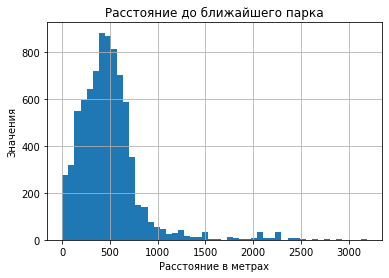

In [20]:
# print(data['parks_nearest'].describe())
# print(data['parks_nearest'].value_counts().sort_values(ascending = True))
data['parks_nearest'].hist(bins=50)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Значения')
plt.show()

В данном графике можно увидеть, что рядом с большинством недвижимости есть парки.

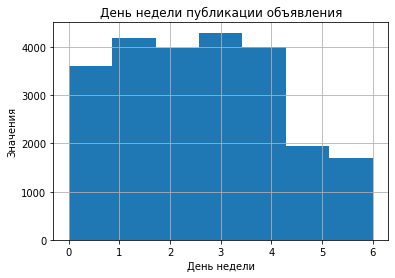

In [21]:
# print(data['day_of_week'].describe())
# print(data['day_of_week'].value_counts().sort_values(ascending = True))
data['day_of_week'].hist(bins=7)
plt.title('День недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Значения')
plt.show()
# день и месяц публикации объявления.

В данном графике видно в какой день недели зачастую публиковались объявления. Если быть точнее, то по вторникам и четвергам объявления публиковались чаще всего. Но больше всего выделяются в данных дни, когда объявления публиковались меньше всего, а то есть суббота и воскресенье.

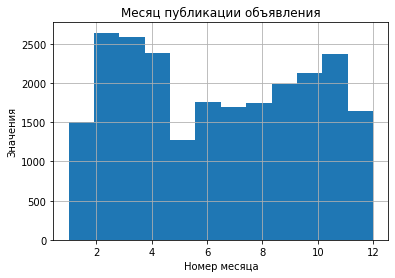

In [22]:
# print(data['month'].describe())
# print(data['month'].value_counts().sort_values(ascending = True))
data['month'].hist(bins=12)
plt.title('Месяц публикации объявления')
plt.xlabel('Номер месяца')
plt.ylabel('Значения')
plt.show()

Здесь видно по месяцам, когда чаще всего публиковались объявления. Как видно по графику, чаще всего объявления публиковалисьс с февраля по апрель и с июня по ноябрь. Это можно связать с тем, что обычно в праздничные дни особо не публикуют объявления о недвижимости, так как на декабрь-январь и май приходится меньше всего объявлений.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


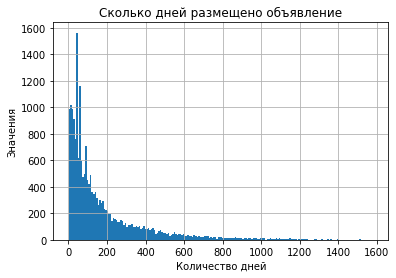

In [23]:
data['days_exposition'].hist(bins=200)
print(data['days_exposition'].describe())
plt.title('Сколько дней размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Значения')
plt.show()

Среднее = 180, медианное = 95 . В данном случае медианное значение выглядит более корректным и точным. Чаще всего квартиры продавались на 95 день. Самая быстрая продажа = 1 день. Самая медленная продажа = 1580 день. До 100 дней продажи считаются особенно быстрыми. Начиная с 400 дня продажи сильно просидают и держатся почти на одном уровне в дальнейшем.

array([[<AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='price_one', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='living_area', ylabel='price_one'>,
        <AxesSubplot:xlabel='price_one', ylabel='price_one'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_one'>],
       [<AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='price_one', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>]],
      dtype=object)

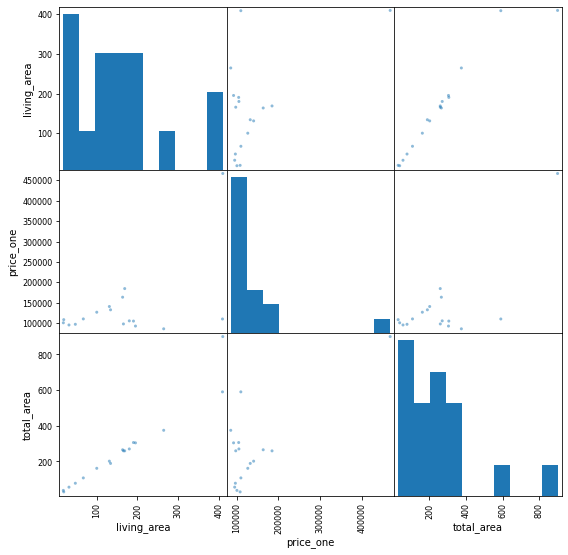

In [24]:
#Зависимость цены от общей площади и от жилой площади.
area =  data.pivot_table(index='rooms', values=['living_area', 'total_area', 'price_one'])
pd.plotting.scatter_matrix(area, figsize = (9,9))

Из графиков видно, что чем больше общая площадь, тем выше цена, за небольшим исключением. То же самое и с жилой площадью. Видно так же соотношение жилой площади и общей площади, жилая площадь по графикам всегда меньше общей площади. Самые дорогие цены за квадратный метр приходятся на 200 кв м жилой площади и 250 кв м общей площади.

array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='price_one', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='price_one'>,
        <AxesSubplot:xlabel='price_one', ylabel='price_one'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_one'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='price_one', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>]], dtype=object)

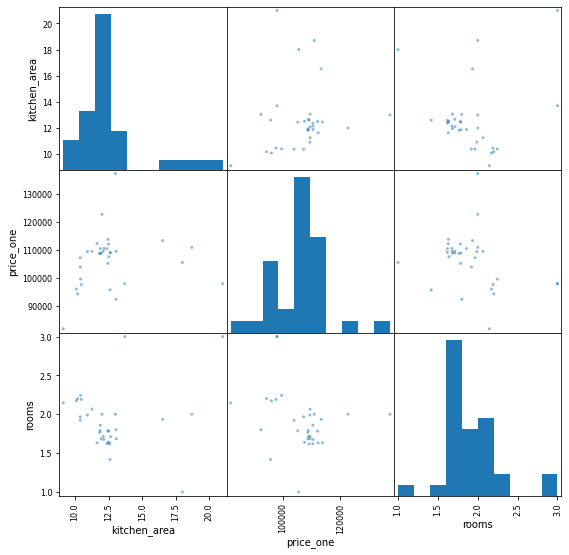

In [25]:
#Зависимость цены от общей площади и от жилой площади.
area =  data.pivot_table(index='floor', values=['kitchen_area', 'rooms', 'price_one'])
pd.plotting.scatter_matrix(area, figsize = (9,9))

В данном случае можно наблюдать, что больше всего концетрация на 2 комнатах с ценой 110 тыс. А так же на кухне с 12 кв.м. площадью с той же ценой. Так же в данных видно, что как правило, в двухкомнатной квартире площадь кухни равна 12.5 кв.м.

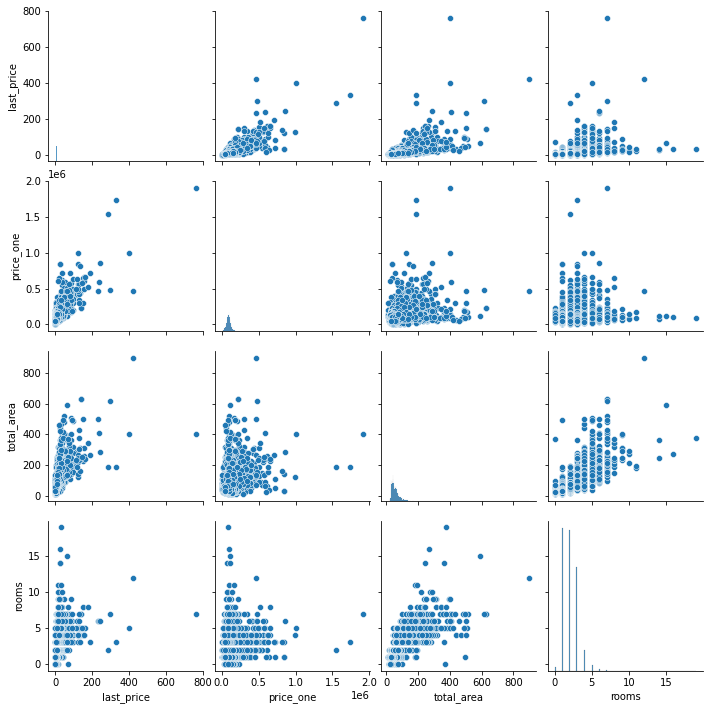

In [26]:
import seaborn as sns
sns.pairplot(data[['last_price', 'price_one', 'total_area', 'rooms']])

На графике так же видно все зависимости, например чем больше общая площадь жилья - тем больше комнат в квартире. Или же чем выше цена за недвижимость - тем больше площадь и комнат.


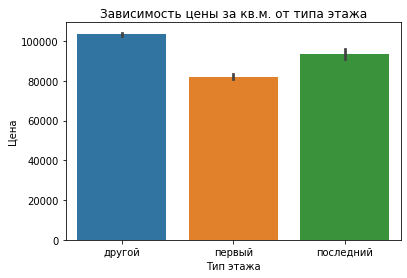

In [27]:
sns.barplot(data=data, x="apartment_floor", y="price_one")
plt.title('Зависимость цены за кв.м. от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

На данном графике можно увидеть, что дороже всего цена за квадратный метр на всех этажах кроме первого и последнего. Меньше всего люди предпочитают квартиру на первом этаже.

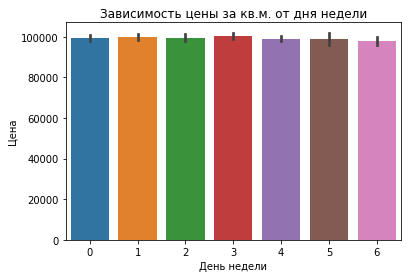

In [28]:
sns.barplot(data=data, x="day_of_week", y="price_one")
plt.title('Зависимость цены за кв.м. от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

В графиках по дням недели чётко видно что цены за квадратный метр падают на выходных, в будние дни они значительно больше.

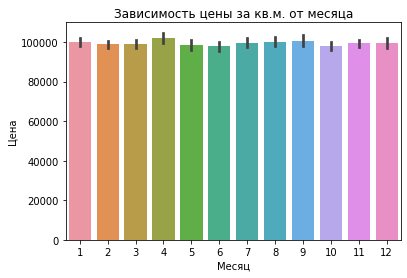

In [29]:
sns.barplot(data=data, x="month", y="price_one")
plt.title('Зависимость цены за кв.м. от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

В графиках по месяцам видно что цена за квадратный метр стала больше в месяцах 4, 7, 8, 9. Возможно это связано с тем, что в эти месяцы меньше всего праздников.

In [30]:
print(data['year'].unique())

[2019 2018 2015 2017 2016 2014]


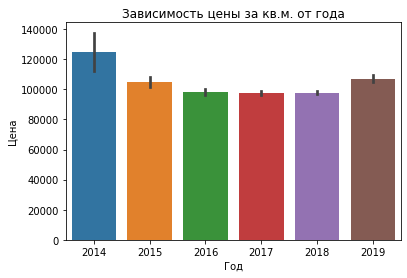

In [31]:
sns.barplot(data=data, x="year", y="price_one")
plt.title('Зависимость цены за кв.м. от года')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Вывод по графикам за год: в 2014 была самая дорогая цена за квадратный метр. Видно что в 2017 и 2018 годы цена за квадратный метр была дешевле всего. В 2019 году цена за 1 квадратный метр стала дороже.

Санкт-Петербург      15721
Мурино                 590
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64
Index(['Санкт-Петербург', 'Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин',
       'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'],
      dtype='object')


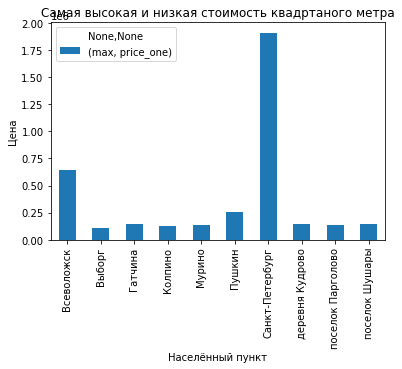

In [32]:
ten_locality = data['locality_name'].value_counts().head(10)
print(ten_locality)
ten_locality = ten_locality.index
print(ten_locality)

ten_locality_mean_max_min_metr = (data.query('locality_name in @ten_locality').pivot_table(index='locality_name', values='price_one', aggfunc=['mean','min','max']))
ten_locality_mean_max_min_metr

qqq = (data.query('locality_name in @ten_locality').pivot_table(index='locality_name', values='price_one', aggfunc=['max']))
qqq.plot(kind='bar')
plt.title('Самая высокая и низкая стоимость квадртаного метра')
plt.xlabel('Населённый пункт')
plt.ylabel('Цена')
plt.show()

Как видно из таблички, населённый пункт с самым дорогим квадратным метром - Санкт-Петербург. С самым дешёвым квадратным метром - Выборг.

In [33]:
# # 6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
# data['distance_to_city_center'] = data['cityCenters_nearest']
# data['distance_to_city_center'] = (data['distance_to_city_center']/1000).round(0).astype(int)
# print(data['distance_to_city_center'])
# print(data)


spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data['distance_to_spb_center'] = (data['cityCenters_nearest']/1000).round(0)
price_distance = spb_data.query('distance_to_spb_center > 0').pivot_table(index = 'distance_to_spb_center', values = 'price_one', aggfunc='mean')
price_distance

/tmp/ipykernel_48/3351938504.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['distance_to_spb_center'] = (data['cityCenters_nearest']/1000).round(0)


,price_one
distance_to_spb_center,
1.0,177005.407676
2.0,157849.007329
3.0,121387.453704
4.0,133282.874761
5.0,140509.789046
6.0,151012.193621
7.0,156176.879664
8.0,125671.442742
9.0,113131.041911


Похожим способом, как мы искали расстояние до центра в общем, мы нашли расстояние до центра из квартир населенного пункта Санкт-Петербург.
С помощью сводной таблицы нашли среднюю цену за каждый километр.

#Опишите, как стоимость объектов зависит от расстояния до центра города.
Из выгруженных данных явно видно, что чем ближе недвижимость к центру, тем она дороже. Так же видны скачки цен и на более отдалённом расстоянии от центра, например на 27 км от центра. Это так же может быть связано с различными данными, например близость к историческим местам, красивый вид на реку, рядом с аэропортом и так далее. Но основная динамика, что чем квартира ближе к центру - тем она дороже.

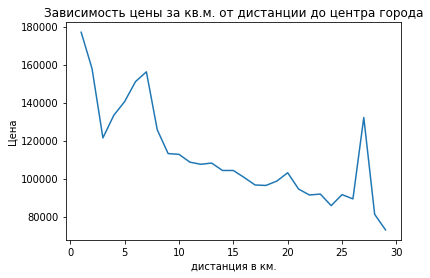

In [34]:
sns.lineplot(data=price_distance, x="distance_to_spb_center", y="price_one")
plt.title('Зависимость цены за кв.м. от дистанции до центра города')
plt.xlabel('дистанция в км.')
plt.ylabel('Цена')
plt.show()

Построил линейный график по данным выше

# Общий вывод

# Итоги выполнения проекта.

Опишу поэтапно что было сделано за проект. Так же под каждым заданием есть описание проделанного.

1.Для начала открыл сам файл с данными и изучил первоначальные данные по нему.
Построил так же гистограму по всему датафрейму, что так же наглядно визуализировало все данные.
Дал краткое описание  датафрейму.

2.Далее приступил к предобработки данных. Изучив данные в первом этапе я уже заприметил пропуски в столбцах. В данном этапе я заполнил все пропуски, которые можно было заполнить логично. Далее просмотрел типы данных в датафрейме и в некоторых столбцах заменил их, так как они были ошибочные. 
Затем поработал со столбцом locality_name и избавился от неявных дубликатов. 
Ну и напоследок в данном этапе избавился от аномалий в данных, например в столбце ceiling_height, где были данные о потолках 25 метров в квартире, что явно сильно выбивается из всех значений.

3.В данном этапе я добавил новые столбцы в таблицу. Для добавления новых столбцов я применял как обычные уравнения, так и метод функций и метод datetime.

4.
4.1.Этот этап посвящён исследовательскому анализу данных. Изучил все параметры объектов каждого столбца более подробно. Для связки каждого параметра создал барплот и описал графики.

4.2.Затем я посчитал как быстро продавались квартиры по дням и визуализировал это в гистограмму. Так же посчитал среднее и медиану.

4.3.Проанализировал какие факторы больше всего влияют на полную стоимость объекта. Построил матричные графики для изучения данных.

4.4. Далее я выделил 10 населённых пунктов с наибольшим числом объявлений и по каждому с помощью сводной таблицы посчитал среднюю цену одного квадратного метра. Так же в этой сводной таблице добавил подсчёт самой высокой и низкой стоимости квадратного метра в населённом пункте.

4.5. Из прошлого задания я выделил с помощью метода .query только данные по Санкт-Петербургу и вычислил среднюю цену недвижимости за каждый километр от центра. Добавил описание зависимости цен от километража.

С полученными данными можно работать и проводить дальнейшие исследования. Данные стали чище и более подробные. Изучены различные зависимости, с помощью которых можно изучить рынок недвижимости.

Прилагаю так же в выводе описание типичной квартиры:

Квартира с высотой потолков 2.5 метра, находится чаще всего на любом этаже, кроме первого и последнего. Общая площадь такой квартиры составляет в среднем 50 кв.м. А жилая площадь около 20-30 кв.м. Кухня в такой квартире имеет площадь 7-10 кв.м. А количество комнат от 1 до 3. Цена такой квартиры 5-7 миллионов рублей